# EDA for LUNA25 Challenge 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys
from glob import glob
from tqdm import tqdm

## Overall Data Description

In [4]:
# Original dicom files
luna25_images = glob('/team/team_blu3/lung/data/2_public/LUNA25_Original/luna25_images/*.mha')
print(f'Number of images: {len(luna25_images)}')

# Annotations
luna25_nodule_blocks_image = glob('/team/team_blu3/lung/data/2_public/LUNA25_Original/luna25_nodule_blocks/image/*.npy')
luna25_nodule_blocks_metadata = glob('/team/team_blu3/lung/data/2_public/LUNA25_Original/luna25_nodule_blocks/metadata/*.npy')

print(f'Number of nodule blocks image: {len(luna25_nodule_blocks_image)}')
print(f'Number of nodule blocks metadata: {len(luna25_nodule_blocks_metadata)}')

Number of images: 4069
Number of nodule blocks image: 6163
Number of nodule blocks metadata: 6163


In [5]:
annot_df = pd.read_csv('/team/team_blu3/lung/data/2_public/LUNA25_Original/LUNA25_Public_Training_Development_Data.csv')
print(f'Number of annotations: {annot_df.shape[0]}')
annot_df.head()

Number of annotations: 6163


,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,LesionID,AnnotationID,NoduleID,label,Age_at_StudyDate,Gender
0,100570,1.2.840.113654.2.55.32380467633296345717423514...,19990102,61.14,-163.28,-177.75,1,100570_1_19990102,100570_1,1,63,Male
1,106364,1.2.840.113654.2.55.16930993607533226779708566...,19990102,30.64,-95.96,-128.59,1,106364_1_19990102,106364_1,1,67,Female
2,127302,1.2.840.113654.2.55.13728437630416839550344528...,20000102,-82.53,-27.85,-209.46,1,127302_1_20000102,127302_1,1,61,Male
3,128899,1.2.840.113654.2.55.40415300708683206534849072...,20010102,-38.69,-8.78,-39.43,1,128899_1_20010102,128899_1,1,64,Male
4,215816,1.3.6.1.4.1.14519.5.2.1.7009.9004.241362276021...,19990102,32.89,-37.98,-100.04,1,215816_1_19990102,215816_1,1,69,Female


In [17]:
col_name_list = annot_df.columns.tolist()

for col in col_name_list:
    print(f'{col}: {annot_df[col].nunique()}')

PatientID: 2120
SeriesInstanceUID: 4069
StudyDate: 3
CoordX: 5470
CoordY: 5642
CoordZ: 5762
LesionID: 17
AnnotationID: 6163
NoduleID: 3762
label: 2
Age_at_StudyDate: 22
Gender: 2


In [9]:
# 2120 patients and 4069 low-dose chest CT scans

# patients number
patients = annot_df['PatientID'].unique()
print(f'Number of patients: {len(patients)}')

# Series number
series = annot_df['SeriesInstanceUID'].unique()
print(f'Number of series: {len(series)}')

Number of patients: 2120
Number of series: 4069


In [12]:
# LesionID
print(annot_df['LesionID'].value_counts())

1     3405
2     1243
3      616
4      369
5      226
6      115
7       65
8       33
9       24
10      18
11      16
12      14
13       9
14       4
16       3
15       2
18       1
Name: LesionID, dtype: int64


In [14]:
# Malignancy 555
# Benign 5608

# Label
print(annot_df['label'].value_counts())

0    5608
1     555
Name: label, dtype: int64


## Add metadata of each nodule 

In [18]:
annot_df = pd.read_csv('/team/team_blu3/lung/data/2_public/LUNA25_Original/LUNA25_Public_Training_Development_Data.csv')
print(f'Number of annotations: {annot_df.shape[0]}')
annot_df.head()

Number of annotations: 6163


,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,LesionID,AnnotationID,NoduleID,label,Age_at_StudyDate,Gender
0,100570,1.2.840.113654.2.55.32380467633296345717423514...,19990102,61.14,-163.28,-177.75,1,100570_1_19990102,100570_1,1,63,Male
1,106364,1.2.840.113654.2.55.16930993607533226779708566...,19990102,30.64,-95.96,-128.59,1,106364_1_19990102,106364_1,1,67,Female
2,127302,1.2.840.113654.2.55.13728437630416839550344528...,20000102,-82.53,-27.85,-209.46,1,127302_1_20000102,127302_1,1,61,Male
3,128899,1.2.840.113654.2.55.40415300708683206534849072...,20010102,-38.69,-8.78,-39.43,1,128899_1_20010102,128899_1,1,64,Male
4,215816,1.3.6.1.4.1.14519.5.2.1.7009.9004.241362276021...,19990102,32.89,-37.98,-100.04,1,215816_1_19990102,215816_1,1,69,Female


In [23]:
test_meta = np.load('/team/team_blu3/lung/data/2_public/LUNA25_Original/luna25_nodule_blocks/metadata/100012_1_19990102.npy', allow_pickle=True).item() 
print(str(test_meta['transform'][0]))
print(test_meta['transform'][1])
print(test_meta['transform'][2])

[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]


In [24]:
nodule_blocks_image_dir = '/team/team_blu3/lung/data/2_public/LUNA25_Original/luna25_nodule_blocks/image/'
nodule_blocks_metadata_dir = '/team/team_blu3/lung/data/2_public/LUNA25_Original/luna25_nodule_blocks/metadata/'

annot_df['nodule_block_image_shape'] = 0
annot_df['x_origin'] = 0
annot_df['y_origin'] = 0
annot_df['z_origin'] = 0
annot_df['x_spacing'] = 0
annot_df['y_spacing'] = 0
annot_df['z_spacing'] = 0
annot_df['x_transform'] = 0
annot_df['y_transform'] = 0
annot_df['z_transform'] = 0

for idx, row in tqdm(annot_df.iterrows(), total=annot_df.shape[0]):
    
    annotat_id = row['AnnotationID']
    image = np.load(os.path.join(nodule_blocks_image_dir, f'{annotat_id}.npy'))
    metadata = np.load(os.path.join(nodule_blocks_metadata_dir, f'{annotat_id}.npy'), allow_pickle=True).item()
    image_shape = image.shape
    origin = metadata['origin']
    spacing = metadata['spacing']
    transform = metadata['transform']
    
    annot_df.loc[idx, 'nodule_block_image_shape'] = str(image_shape)
    annot_df.loc[idx, 'x_origin'] = origin[0]
    annot_df.loc[idx, 'y_origin'] = origin[1]
    annot_df.loc[idx, 'z_origin'] = origin[2]
    annot_df.loc[idx, 'x_spacing'] = spacing[0]
    annot_df.loc[idx, 'y_spacing'] = spacing[1]
    annot_df.loc[idx, 'z_spacing'] = spacing[2]
    annot_df.loc[idx, 'x_transform'] = str(transform[0])
    annot_df.loc[idx, 'y_transform'] = str(transform[1])
    annot_df.loc[idx, 'z_transform'] = str(transform[2])

annot_df.head()

100%|██████████| 6163/6163 [00:33<00:00, 181.35it/s]


,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,LesionID,AnnotationID,NoduleID,label,...,nodule_block_image_shape,x_origin,y_origin,z_origin,x_spacing,y_spacing,z_spacing,x_transform,y_transform,z_transform
0,100570,1.2.840.113654.2.55.32380467633296345717423514...,19990102,61.14,-163.28,-177.75,1,100570_1_19990102,100570_1,1,...,"(64, 128, 128)",-240.899994,-203.187500,21.312500,2.0,0.625000,0.625000,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]
1,106364,1.2.840.113654.2.55.16930993607533226779708566...,19990102,30.64,-95.96,-128.59,1,106364_1_19990102,106364_1,1,...,"(64, 128, 128)",-191.799988,-128.621094,-1.683594,2.0,0.507812,0.507812,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]
2,127302,1.2.840.113654.2.55.13728437630416839550344528...,20000102,-82.53,-27.85,-209.46,1,127302_1_20000102,127302_1,1,...,"(64, 128, 128)",-290.565002,-72.840622,-127.459381,2.5,0.703125,0.703125,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]
3,128899,1.2.840.113654.2.55.40415300708683206534849072...,20010102,-38.69,-8.78,-39.43,1,128899_1_20010102,128899_1,1,...,"(64, 128, 128)",-118.904999,-49.927383,-79.720345,2.5,0.644531,0.644531,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]
4,215816,1.3.6.1.4.1.14519.5.2.1.7009.9004.241362276021...,19990102,32.89,-37.98,-100.04,1,215816_1_19990102,215816_1,1,...,"(64, 128, 128)",-163.950012,-77.467155,-7.078842,2.0,0.621094,0.621094,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]


In [38]:
annot_df.to_csv('LUNA25_Public_Training_Development_Data_with_metadata.csv', index=False)

In [39]:
annot_df = pd.read_csv('LUNA25_Public_Training_Development_Data_with_metadata.csv')
print(annot_df['z_spacing'].value_counts())

2.000000    2896
2.500000    1248
1.250000     647
1.800000     626
1.500000     147
2.000000     118
1.000000     115
0.800000      38
2.500000      27
2.500000      25
1.250000      24
1.250000      22
3.000000      21
0.725000      19
1.300000      17
1.800000      14
1.798950      14
1.800000      13
1.300000      12
0.725000      11
1.800000      11
1.698975      11
1.801025      10
1.300000      10
1.000000       8
1.300000       7
1.800000       7
0.625000       6
1.800049       5
1.600000       5
1.699951       5
1.701050       3
1.300000       3
1.600000       3
3.200000       2
3.200000       2
3.200000       2
0.500000       2
1.700000       2
1.800000       1
3.200001       1
1.600000       1
1.600000       1
1.799988       1
Name: z_spacing, dtype: int64


## 1. Noduel Level Meta Data

In [6]:
def plot_hist(dfs, field_name, xlim=None, ylim=None):
    # get target dfs
    _dfs = {}
    for idx, (name, _df) in enumerate(dfs.items()):
        if field_name in _df.columns:
            _dfs[name] = _df

    # row, col setting
    rows = range(1)
    cols = _dfs.items()
    num_row = len(rows)
    num_col = len(cols)
    
    # init fig
    fig, axes = plt.subplots(nrows=num_row, ncols=num_col, figsize=(num_col * 8, num_row * 3))
    
    # plot images
    for idx_row in rows:
        for idx_col, (name, _df) in enumerate(cols):
            if num_col <= 1 and num_row <= 1:
                _ax = axes
            elif num_col <= 1:
                _ax = axes[idx_row]
            elif num_row <= 1:
                _ax = axes[idx_col]
            else:
                _ax = axes[idx_row, idx_col]
            sns.histplot(x=field_name, data=_df, kde=True, bins=50, ax=_ax)
            if idx_row == 0:
                _ax.set_title(f'{name}', size="x-large")
            if idx_col == 0:
                _ax.set_ylabel('counts', size="large")
            _ax.set_xlabel(field_name, size="large")
            if xlim:
                _ax.set_xlim(xlim[0], xlim[1])
            if ylim:
                _ax.set_ylim(ylim[0], ylim[1])
            _ax.tick_params(axis="both", labelsize="large")
    fig.tight_layout()

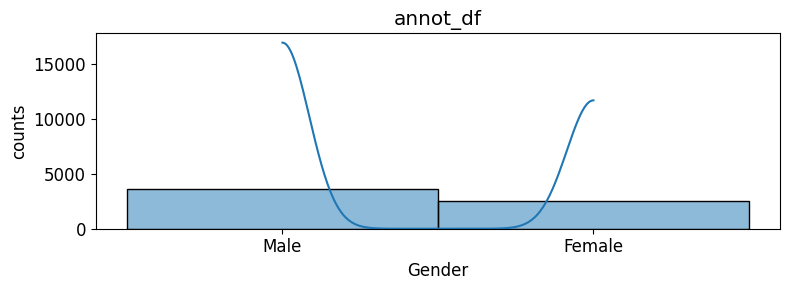

In [10]:
plot_hist({'annot_df': annot_df}, 'Gender')

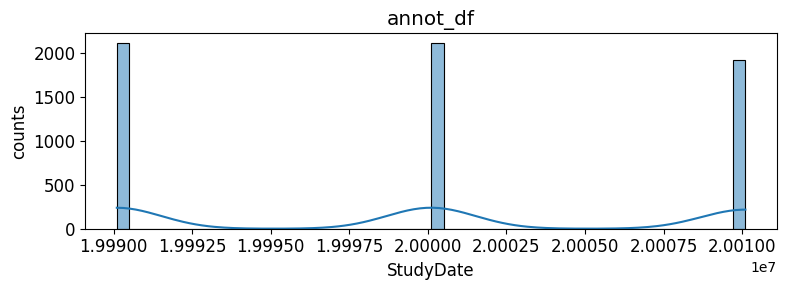

In [11]:
plot_hist({'annot_df': annot_df}, 'StudyDate')

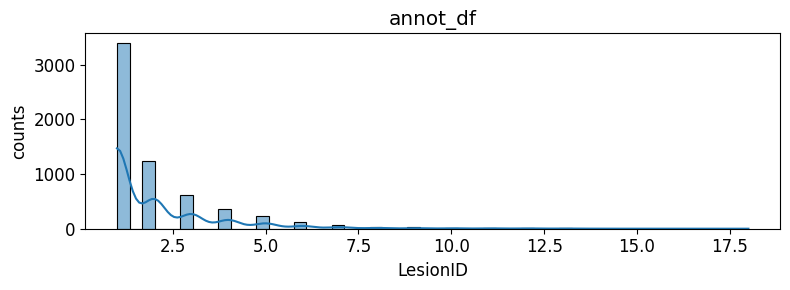

In [12]:
plot_hist({'annot_df': annot_df}, 'LesionID')

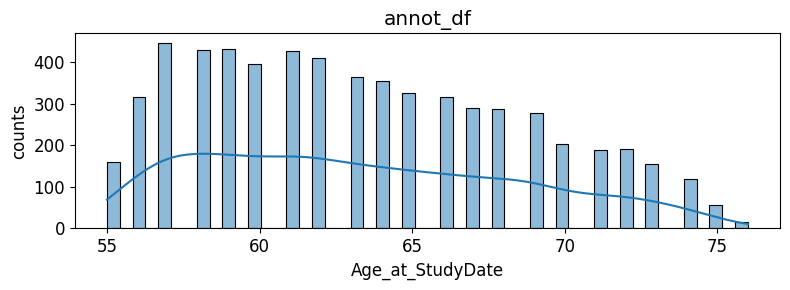

In [13]:
plot_hist({'annot_df': annot_df}, 'Age_at_StudyDate')


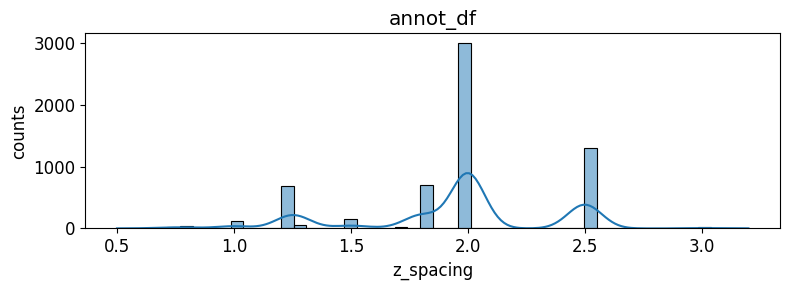

In [40]:
plot_hist({'annot_df': annot_df}, 'z_spacing')

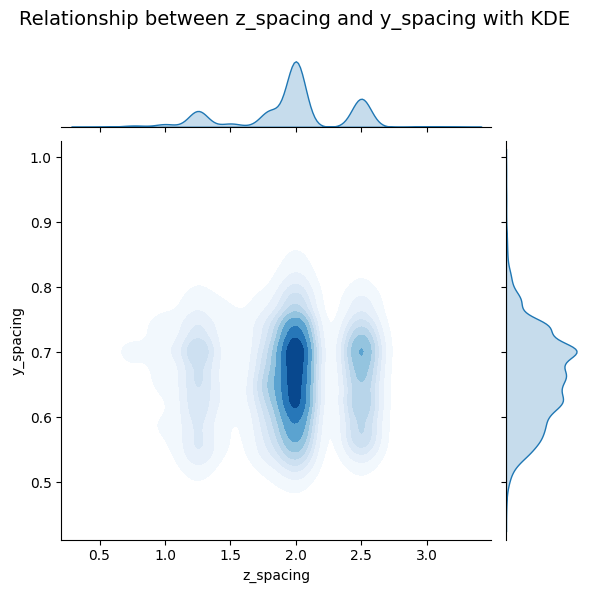

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out cases where the data has only a single unique value
if annot_df['z_spacing'].nunique() > 1 and annot_df['y_spacing'].nunique() > 1:
    # jointplot 생성
    g = sns.jointplot(
        data=annot_df,
        x='z_spacing',
        y='y_spacing',
        kind='kde',
        fill=True,
        cmap='Blues',
        marginal_kws={'shade': True}
    )

    # Set the title
    g.fig.suptitle('Relationship between z_spacing and y_spacing with KDE', fontsize=14)
    plt.subplots_adjust(top=0.9)
    plt.show()
else:
    print("z_spacing or y_spacing has zero variance. KDE plot cannot be generated.")


## 2. Patient Level Meta Data

In [11]:
annot_df = pd.read_csv('LUNA25_Public_Training_Development_Data_with_metadata.csv')
annot_df.head()

,PatientID,SeriesInstanceUID,StudyDate,CoordX,CoordY,CoordZ,LesionID,AnnotationID,NoduleID,label,...,nodule_block_image_shape,x_origin,y_origin,z_origin,z_spacing,y_spacing,x_spacing,x_transform,y_transform,z_transform
0,100570,1.2.840.113654.2.55.32380467633296345717423514...,19990102,61.14,-163.28,-177.75,1,100570_1_19990102,100570_1,1,...,"(64, 128, 128)",-240.899994,-203.187500,21.312500,2.0,0.625000,0.625000,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]
1,106364,1.2.840.113654.2.55.16930993607533226779708566...,19990102,30.64,-95.96,-128.59,1,106364_1_19990102,106364_1,1,...,"(64, 128, 128)",-191.799988,-128.621094,-1.683594,2.0,0.507812,0.507812,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]
2,127302,1.2.840.113654.2.55.13728437630416839550344528...,20000102,-82.53,-27.85,-209.46,1,127302_1_20000102,127302_1,1,...,"(64, 128, 128)",-290.565002,-72.840622,-127.459381,2.5,0.703125,0.703125,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]
3,128899,1.2.840.113654.2.55.40415300708683206534849072...,20010102,-38.69,-8.78,-39.43,1,128899_1_20010102,128899_1,1,...,"(64, 128, 128)",-118.904999,-49.927383,-79.720345,2.5,0.644531,0.644531,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]
4,215816,1.3.6.1.4.1.14519.5.2.1.7009.9004.241362276021...,19990102,32.89,-37.98,-100.04,1,215816_1_19990102,215816_1,1,...,"(64, 128, 128)",-163.950012,-77.467155,-7.078842,2.0,0.621094,0.621094,[1. 0. 0.],[0. 1. 0.],[0. 0. 1.]


In [12]:
annot_df['label'].value_counts()

0    5608
1     555
Name: label, dtype: int64

In [13]:
# groupby PatientID
print(len(annot_df['PatientID'].unique()))
source_col =['PatientID', 'StudyDate', 'label','Age_at_StudyDate', 'Gender', 'z_spacing']
censored_annot_df = annot_df[source_col]
print(len(censored_annot_df))
censored_annot_df.head()

2120
6163


,PatientID,StudyDate,label,Age_at_StudyDate,Gender,z_spacing
0,100570,19990102,1,63,Male,2.0
1,106364,19990102,1,67,Female,2.0
2,127302,20000102,1,61,Male,2.5
3,128899,20010102,1,64,Male,2.5
4,215816,19990102,1,69,Female,2.0


In [ ]:
# Group by PatientID
patient_df = annot_df.groupby('PatientID').agg(
    StudyDate=('StudyDate', lambda x: list(set(x))),
    malignancy=('label', lambda x: (x == 0).sum()),
    benign=('label', lambda x: (x == 1).sum()),
    Age_at_StudyDate=('Age_at_StudyDate', lambda x: list(set(x))),
    Gender=('Gender', lambda x: x.mode()[0]),  # 최빈값(가장 많이 등장한 성별)
    z_spacing_min=('z_spacing', 'min'),
    z_spacing_max=('z_spacing', 'max')
).reset_index()

print(len(patient_df))
patient_df.head()

2120


,PatientID,StudyDate,malignancy,benign,Age_at_StudyDate,Gender,z_spacing_min,z_spacing_max
0,100012,"[20000102, 19990102]",0,2,"[61, 62]",Female,2.0,2.0
1,100035,"[20010102, 20000102, 19990102]",3,0,"[56, 57, 55]",Female,2.5,2.5
2,100069,"[20010102, 20000102]",6,0,"[65, 66]",Female,2.0,2.0
3,100095,"[20010102, 20000102, 19990102]",12,0,"[64, 65, 66]",Male,2.0,2.0
4,100150,"[20010102, 20000102]",2,0,"[57, 58]",Male,2.0,2.0


In [15]:
patient_df.to_csv('LUNA25_Public_Training_Development_Data_Patient.csv', index=False)

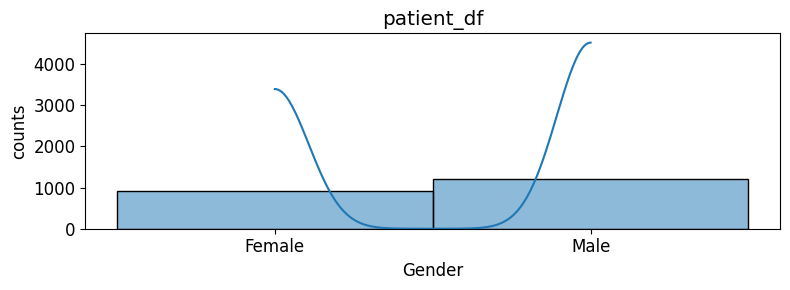

In [16]:
plot_hist({'patient_df': patient_df}, 'Gender')

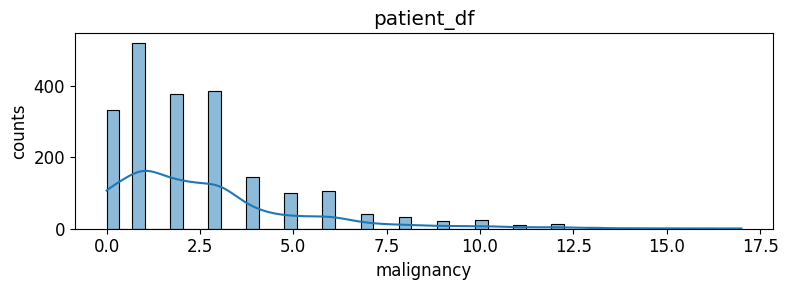

In [17]:
plot_hist({'patient_df': patient_df}, 'malignancy')

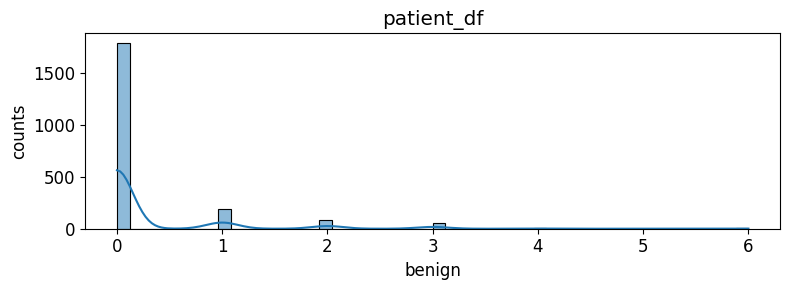

In [18]:
plot_hist({'patient_df': patient_df}, 'benign')

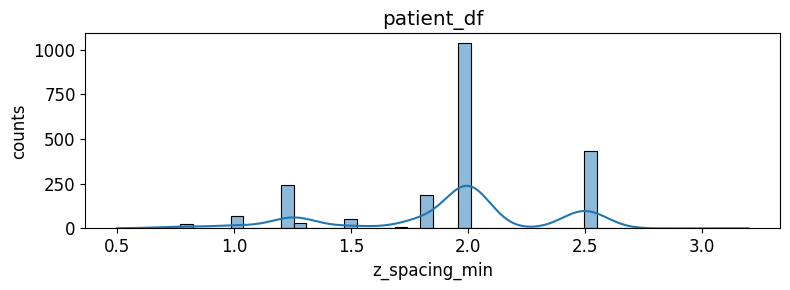

In [19]:
plot_hist({'patient_df': patient_df}, 'z_spacing_min')

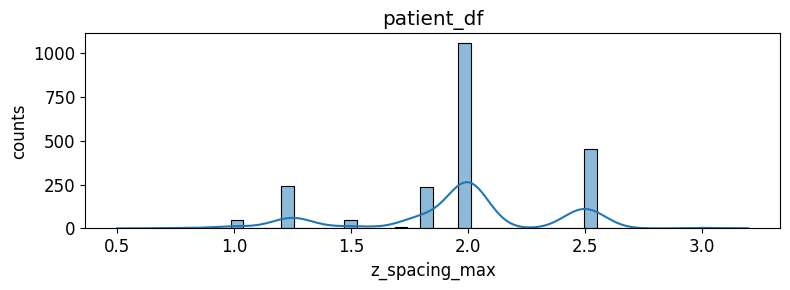

In [20]:
plot_hist({'patient_df': patient_df}, 'z_spacing_max')